In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import numpy as np
np.random.seed(44)


import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn-dark-palette')
mpl.style.use('seaborn-whitegrid')
%matplotlib inline

import tensorflow as tf

from utils import (
    read_images,
    get_num_images_per_character,
    load_facenet,
    prepare_batch,
    calc_embeddings,
    setup_memory,
    eval_facenet_without_memory,
    train_and_eval_facenet_with_memory,
)

In [5]:
images = read_images()
num_images_per_character = get_num_images_per_character(images)

YOU ARE USING JPEGS!!!
YOU ARE USING JPEGS!!!
YOU ARE USING JPEGS!!!
YOU ARE USING JPEGS!!!
YOU ARE USING JPEGS!!!
YOU ARE USING JPEGS!!!
YOU ARE USING JPEGS!!!
YOU ARE USING JPEGS!!!
YOU ARE USING JPEGS!!!
YOU ARE USING JPEGS!!!
YOU ARE USING JPEGS!!!
YOU ARE USING JPEGS!!!


In [6]:
# from glob import glob

# for prefix in glob('facenet/datasets/faces_out/*'):
#     subpaths = glob(prefix + '/*')
#     for path in subpaths:
#         suffix = path.split('/')[-1][:-3]
#         new_file = '/'.join(path.split('/')[:-1]) + '/' + suffix + 'jpg'
#         ! convert $path $new_file

In [7]:
my_graph = tf.Graph()
my_sess = tf.Session(graph=my_graph)

In [8]:
images_placeholder, phase_train_placeholder, embedding_tensor = load_facenet(my_graph, my_sess)

Model directory: 20170512-110547
Metagraph file: model-20170512-110547.meta
Checkpoint file: model-20170512-110547.ckpt-250000
'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.
INFO:tensorflow:Restoring parameters from 20170512-110547/model-20170512-110547.ckpt-250000


In [9]:
embeddings = calc_embeddings(images, my_sess, images_placeholder, phase_train_placeholder, embedding_tensor)

In [10]:
results = eval_facenet_without_memory(embeddings)

0.09375
0.8333333333333334
1.0
0.9166666666666666
0.8333333333333334
1.0
0.9166666666666666


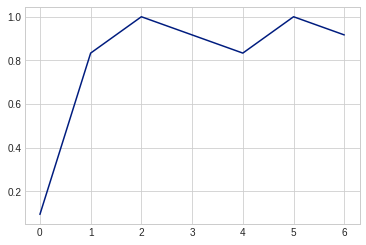

In [11]:
plot_points = []

for shot, res in results.iteritems():
    labels, preds = res['true'], res['pred']
    acc = (labels == preds).mean()
    print(acc)
    plot_points.append(acc)
    
plt.plot(plot_points)

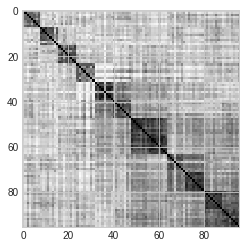

In [12]:
embedds = np.concatenate([
    embedd for embedd in embeddings.values()
])

cossims_mat = embedds.dot(embedds.T)

plt.imshow(cossims_mat)

In [13]:
mem_var_init_op, labels_placeholder, closest_label_pred, train_op = setup_memory(my_graph, embedding_tensor)

Instructions for updating:
dim is deprecated, use axis instead


In [14]:
results = train_and_eval_facenet_with_memory(images, my_sess, images_placeholder, phase_train_placeholder, labels_placeholder, mem_var_init_op, train_op, closest_label_pred)

0.08333333333333333
0.8333333333333334
1.0
0.9166666666666666
0.9166666666666666
0.9166666666666666
1.0


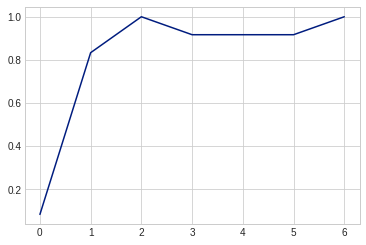

In [15]:
plot_points = []

for shot, res in results.iteritems():
    labels, preds = res['true'], res['pred']
    acc = (labels == preds).mean()
    print(acc)
    plot_points.append(acc)
    
plt.plot(plot_points)